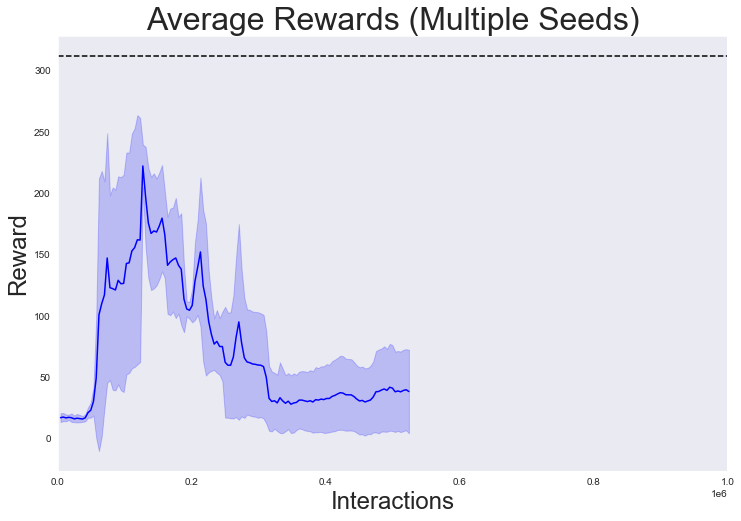

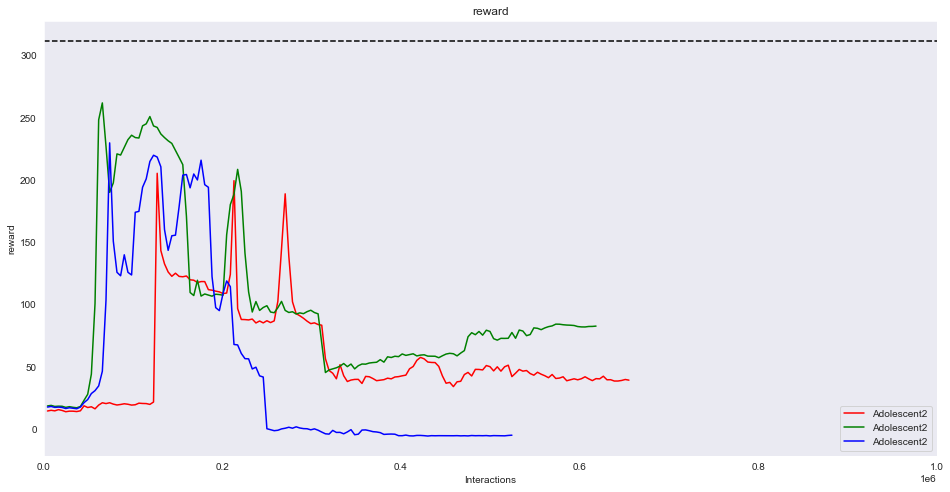

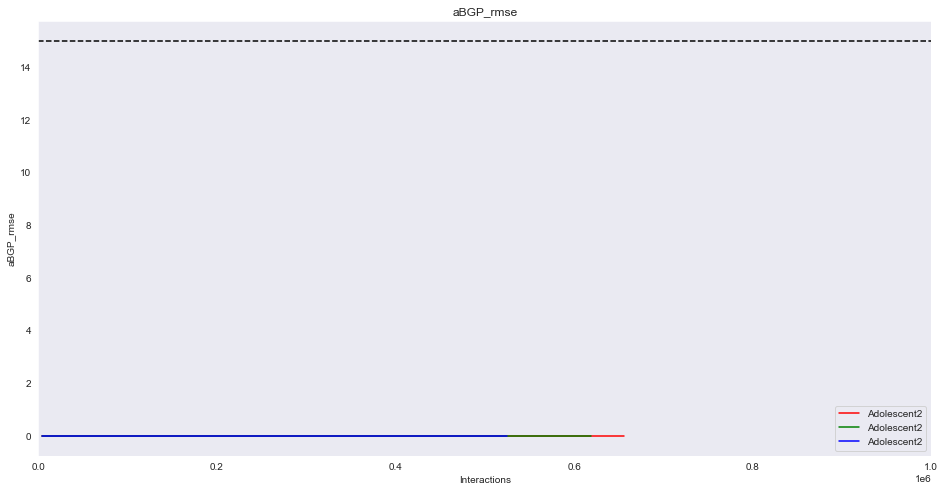

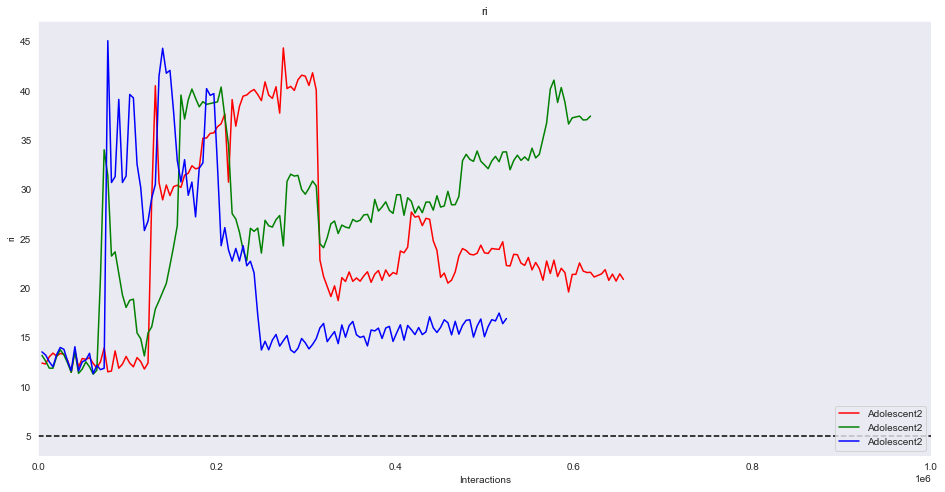

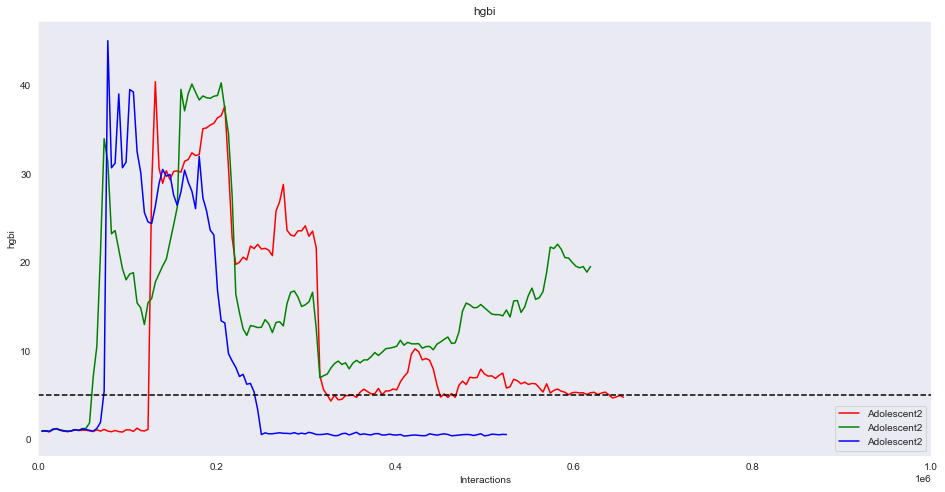

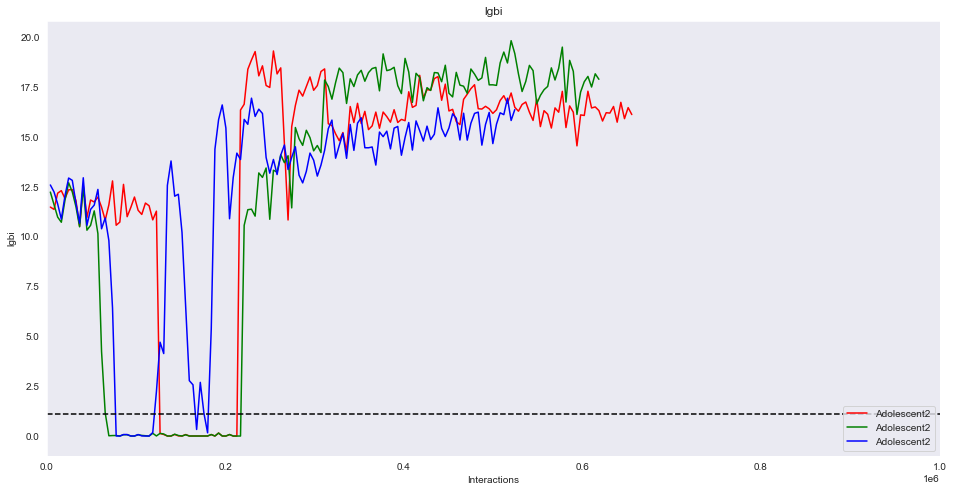

In [67]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = 'C:/Users/davet/Desktop/Thesis/G2P2C/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

FOLDER = '/DDPG_BatchNormalisation/OUNoise_Sigma_5e-1/'
ALGO = 'DDPG'#'DDPG' TD3
SUBJECT = '2'
PATH = FOLDER+ALGO+SUBJECT
COHORT = 'Adolescent'

LABEL = COHORT+SUBJECT

exp1 = ExperimentVisualise(id=PATH+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'_3', version=1.1, plot_version=1, test_seeds=5000)

# plot the graphs
command = []
dis_len = 1.0 * 1000000
disp_arr = display_commands_v2(command)
exp_vis = {
             '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL}, 
             '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":LABEL},  
             '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":LABEL}, 
}
# average metric
plot_testing_average_metric(exp_vis, [['1', '2', '3']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)

params = ['policy_loss', 'value_loss', 'pi_grad', 'val_grad'] #, 'pi_loss'
# params = ['policy_grad', 'value_grad'] #, 'pi_loss'

# plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
#params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
#params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {108: 110}, 't': {108: 93}, 'reward': {108: 66.93286}, 'normo': {108: 47.31182795698925}, 'hypo': {108: 7.526881720430108}, 'sev_hypo': {108: 5.376344086021505}, 'hyper': {108: 39.784946236559136}, 'lgbi': {108: 18.465633}, 'hgbi': {108: 9.947779}, 'ri': {108: 28.413412}, 'sev_hyper': {108: 0.0}, 'aBGP_rmse': {108: 0}, 'cBGP_rmse': {108: 0}}
{'epi': {108: 110}, 't': {108: 85}, 'reward': {108: 60.02408}, 'normo': {108: 43.52941176470589}, 'hypo': {108: 1.1764705882352942}, 'sev_hypo': {108: 1.1764705882352942}, 'hyper': {108: 54.11764705882353}, 'lgbi': {108: 16.19906}, 'hgbi': {108: 10.744592}, 'ri': {108: 26.943653}, 'sev_hyper': {108: 0.0}, 'aBGP_rmse': {108: 0}, 'cBGP_rmse': {108: 0}}
{'epi': {108: 110}, 't': {108: 86}, 'reward': {108: 61.16709}, 'normo': {108: 52.325581395348834}, 'hypo': {108: 1.162790697674419}, 'sev_hypo': {108: 2.3255813953488373}, 'hyper': {108: 44.18604651162791}, 'lgbi': {108: 16.88772}, 'hgbi': {108: 10.32833}, 'ri': {108: 27

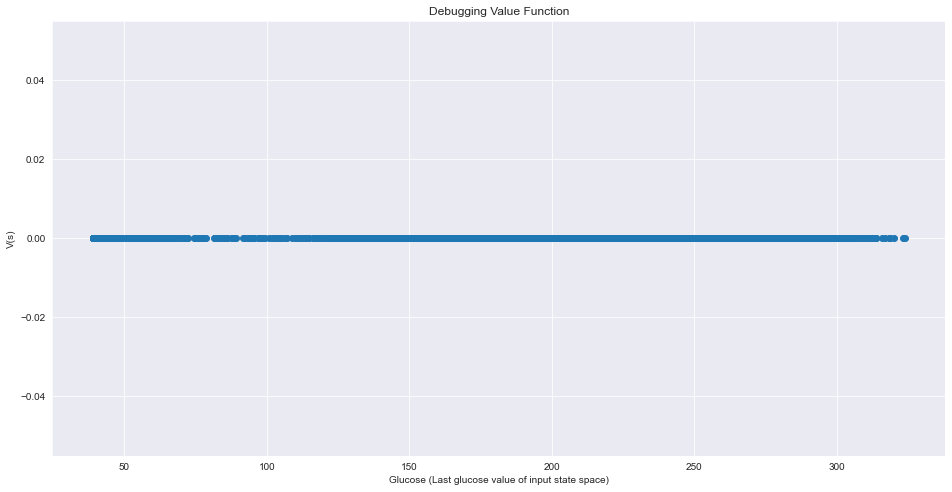

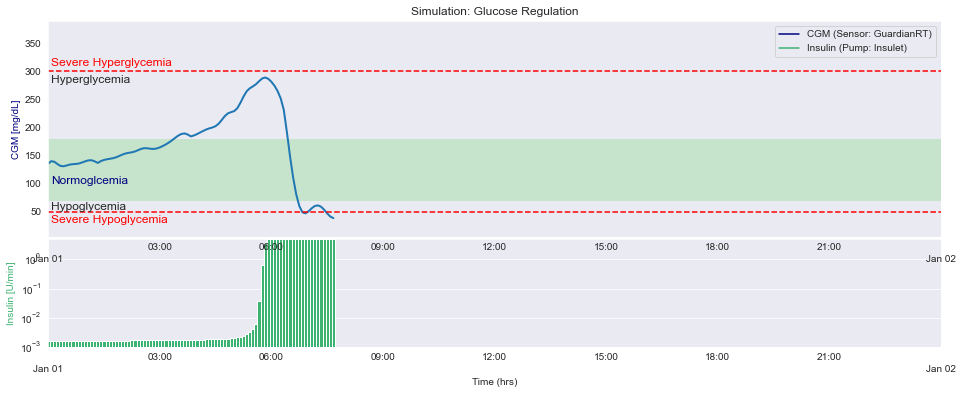

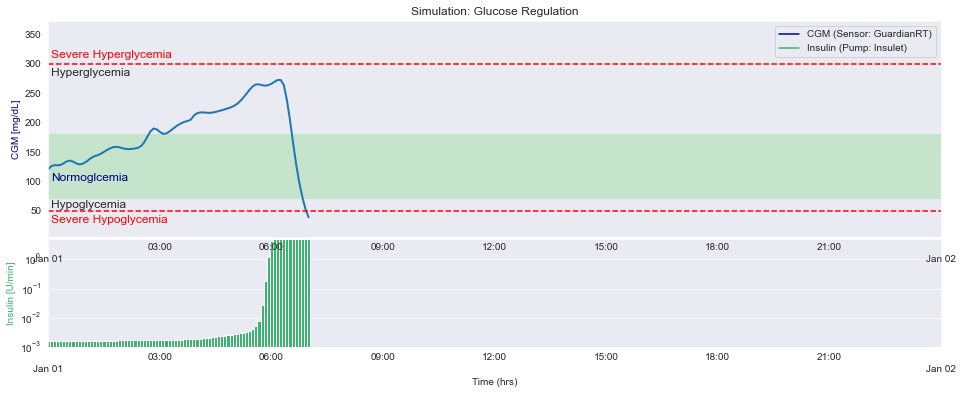

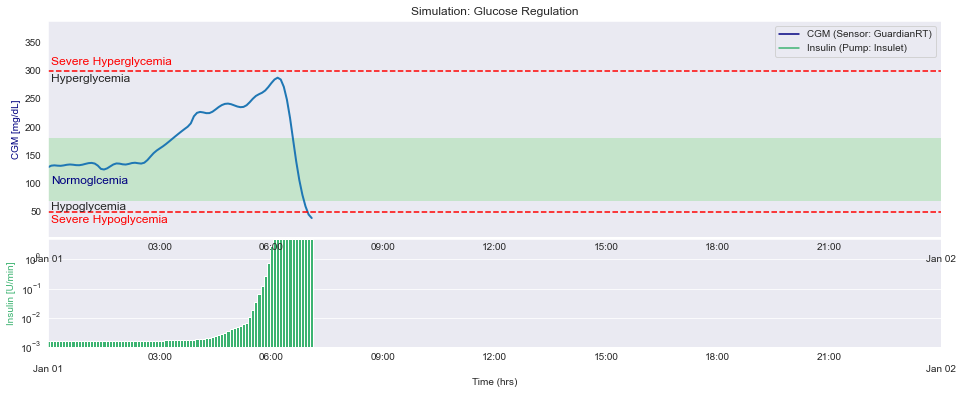

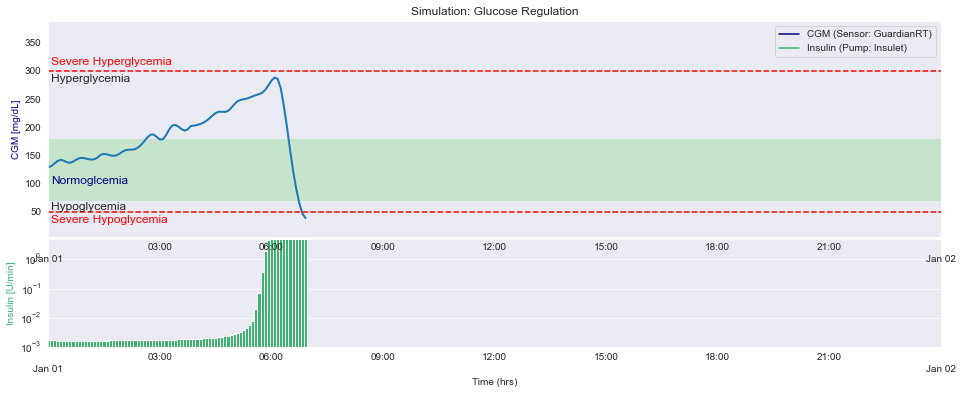

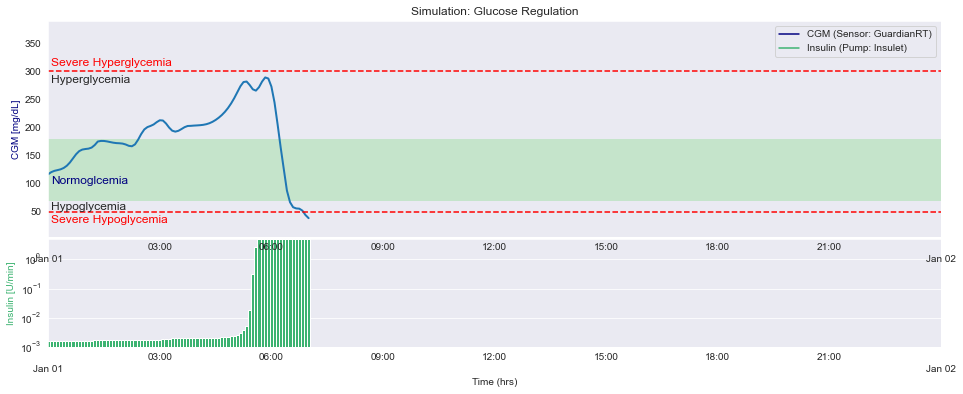

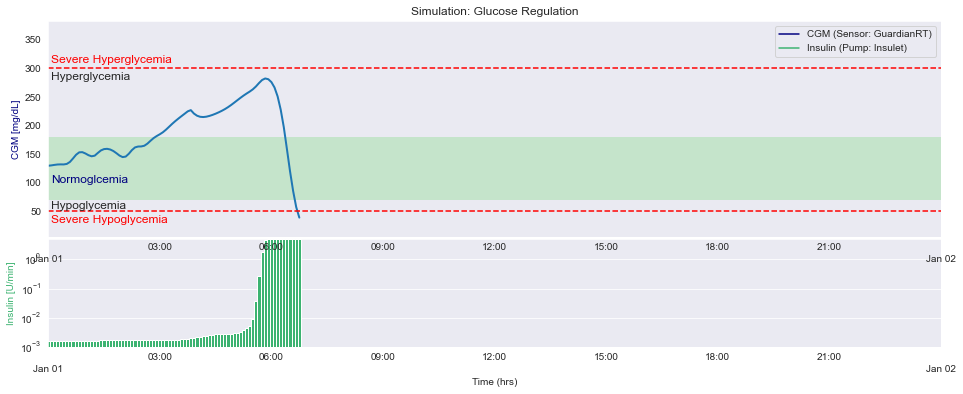

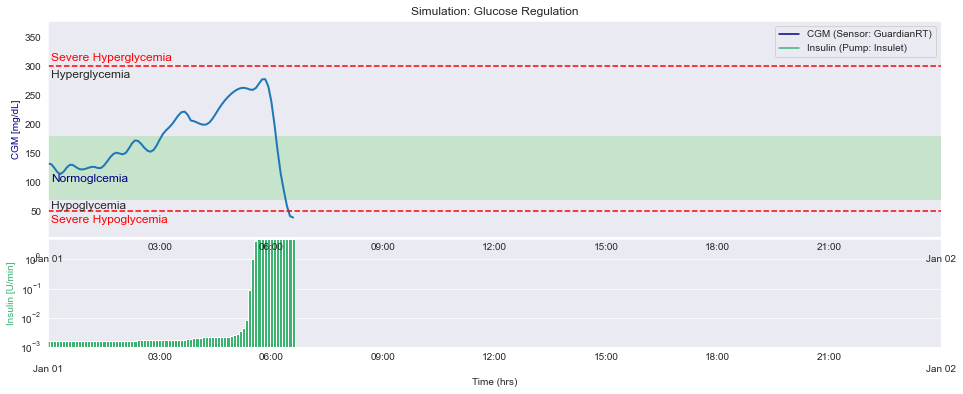

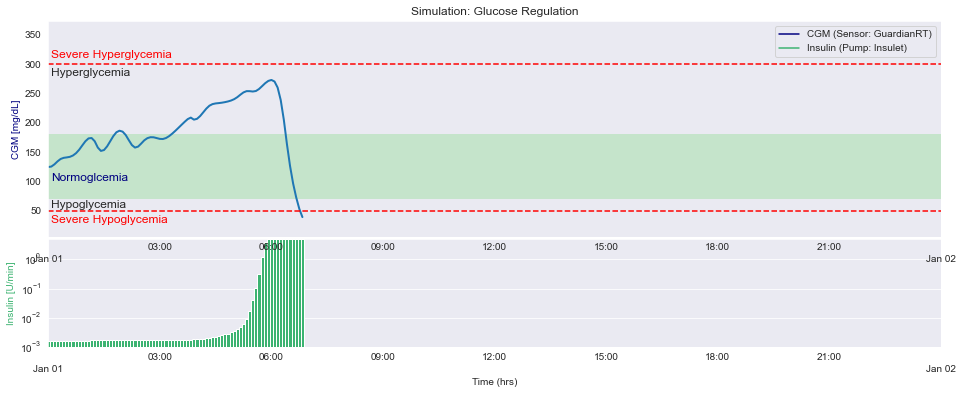

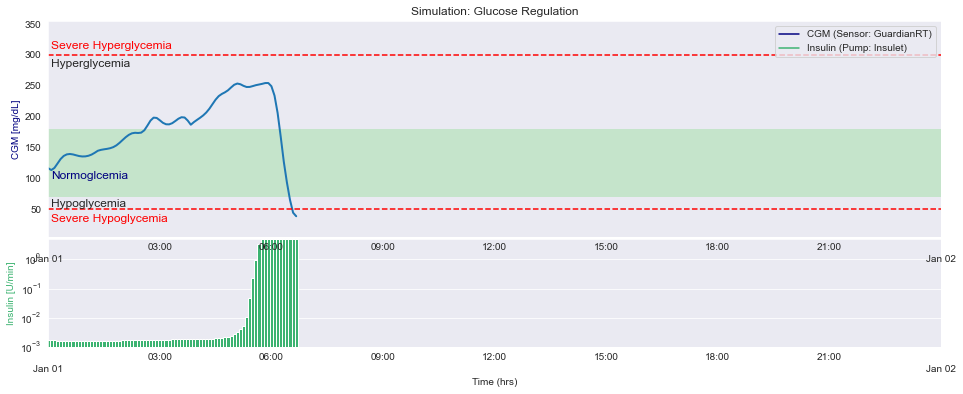

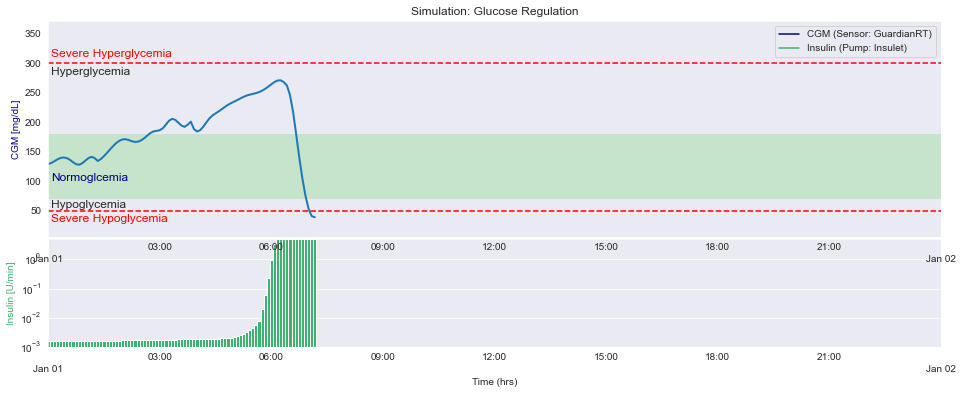

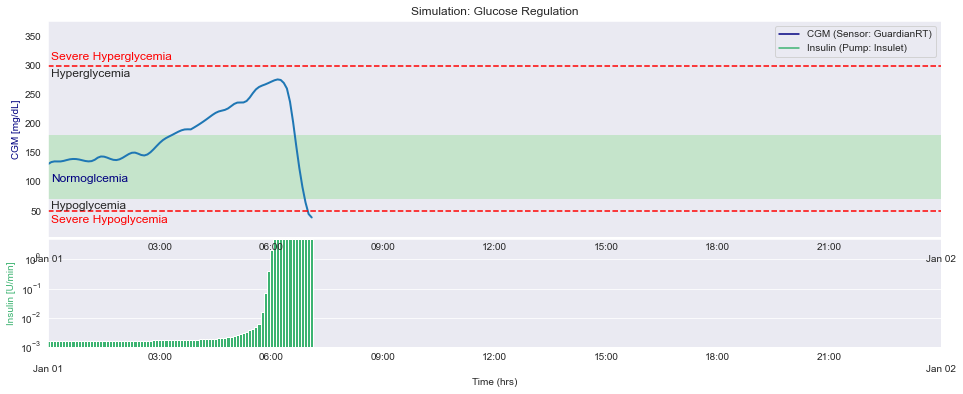

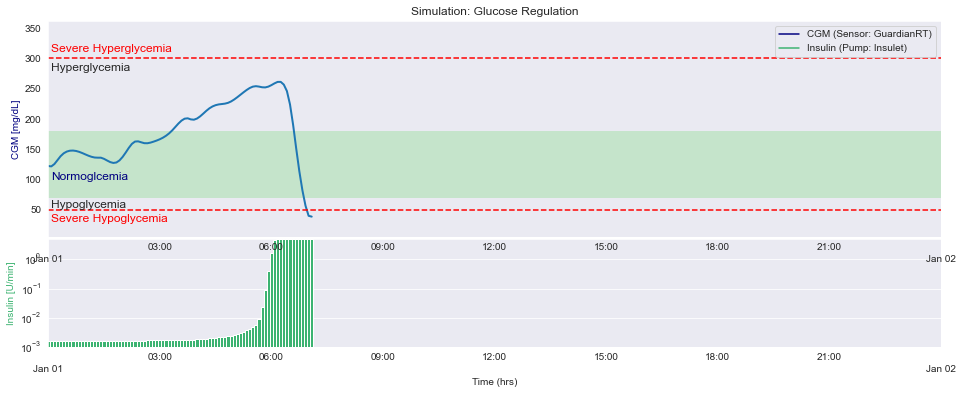

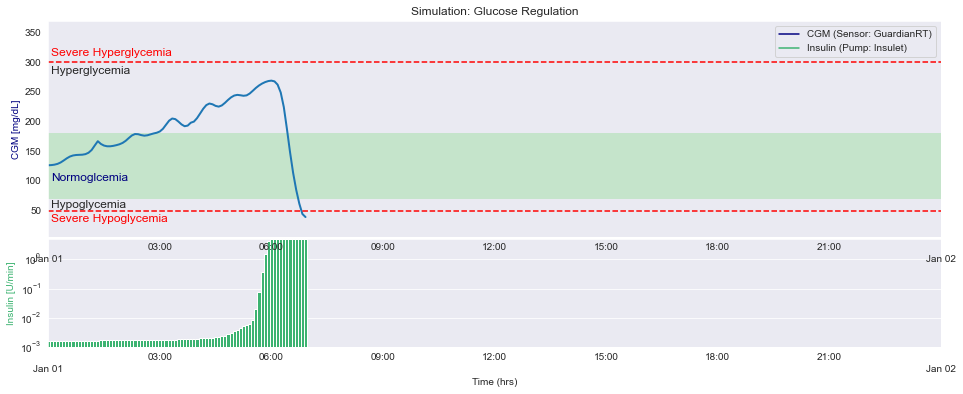

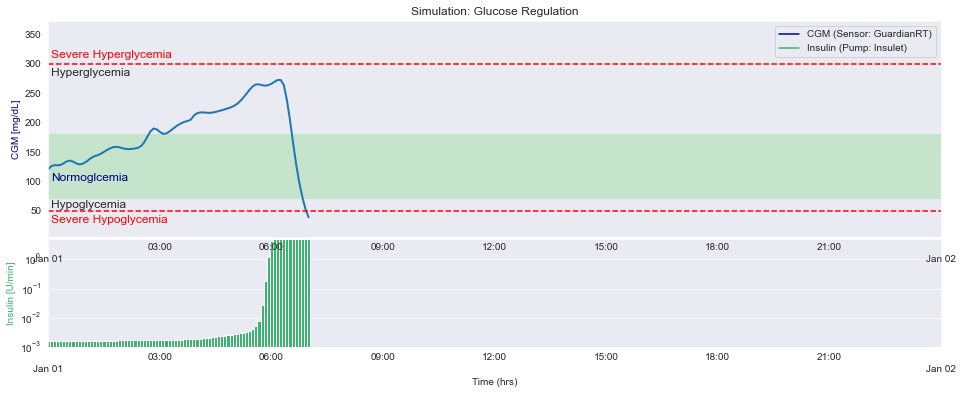

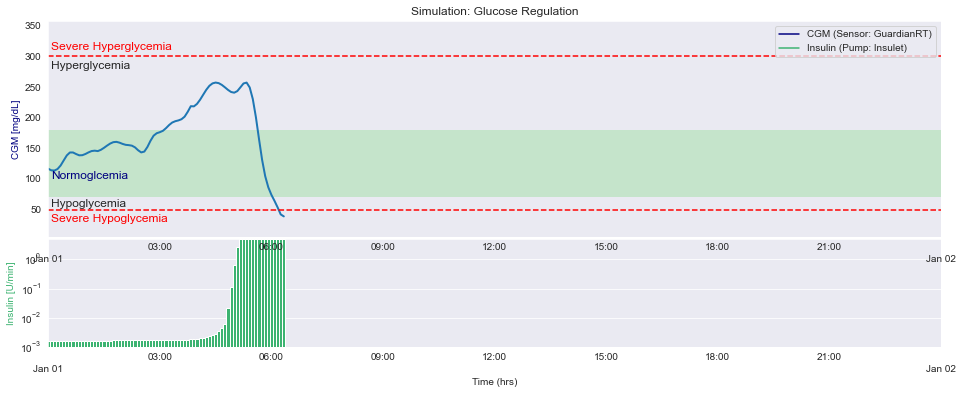

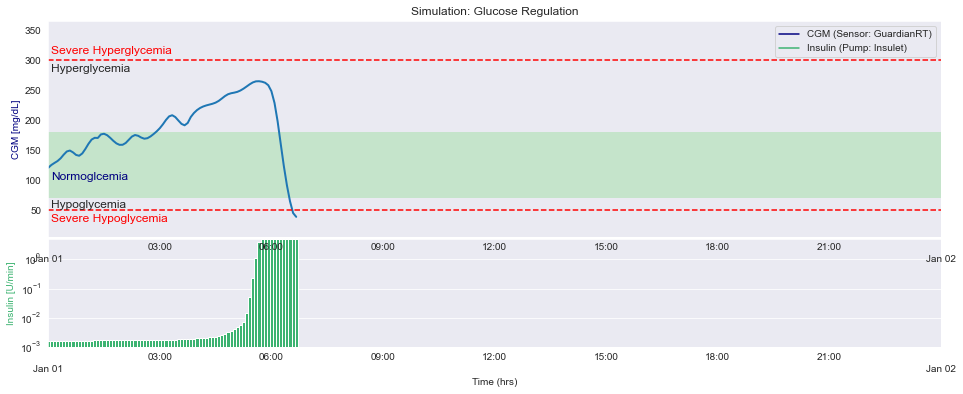

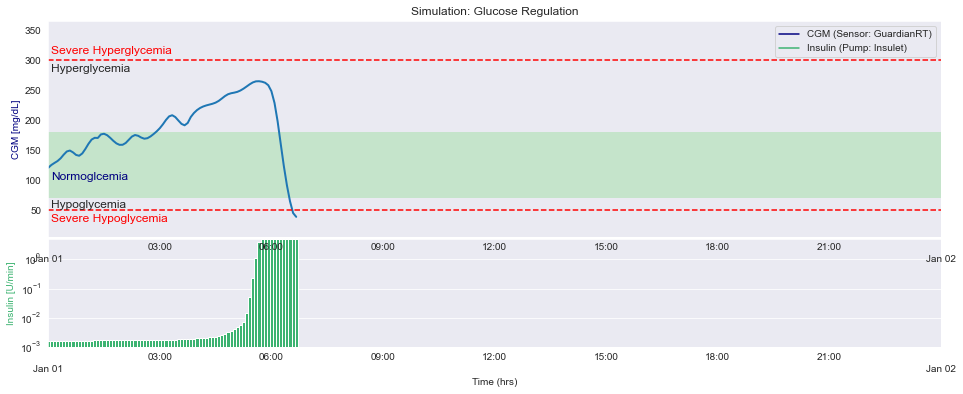

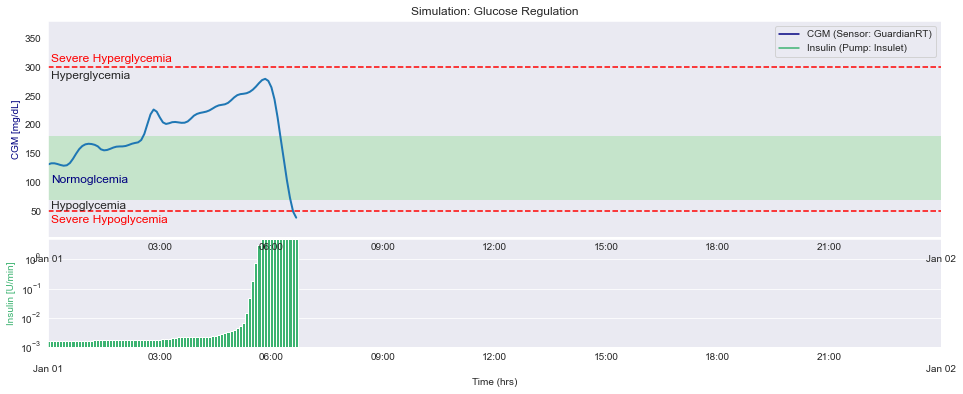

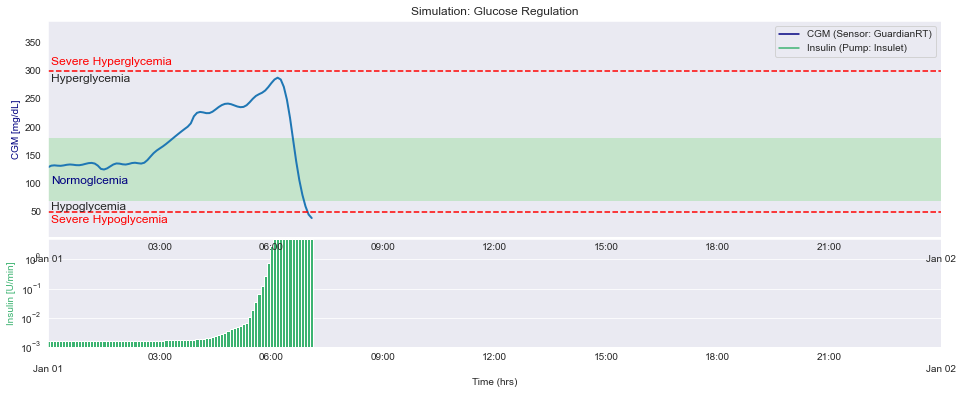

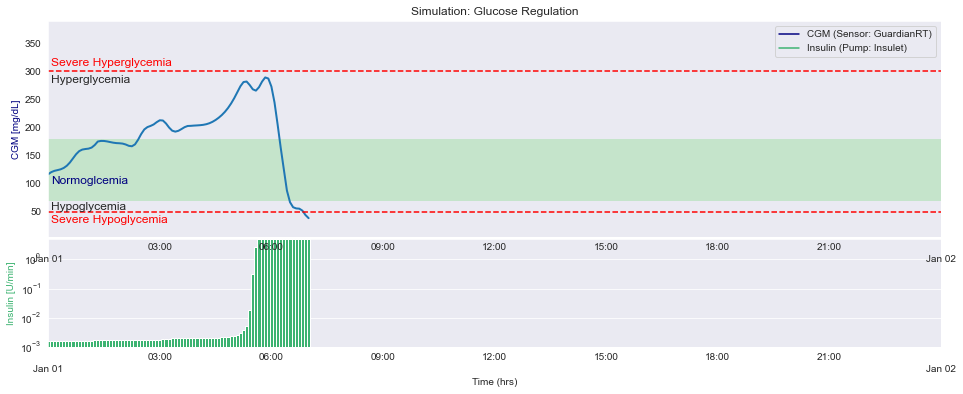

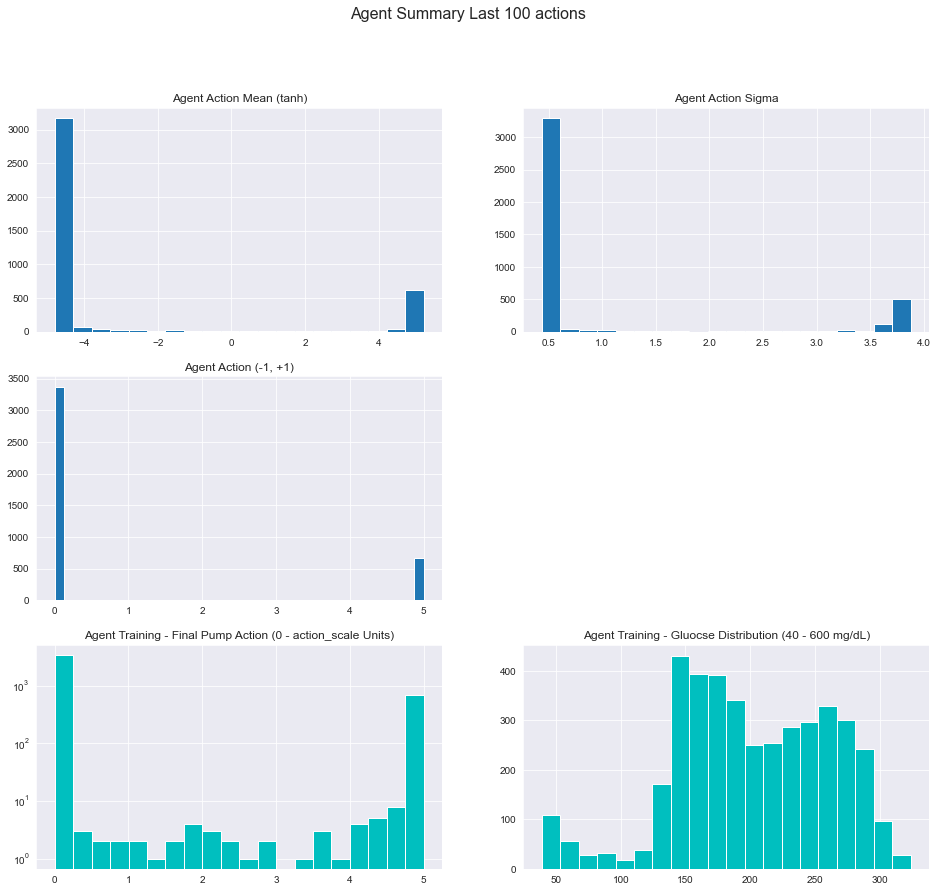

In [63]:

## debugging a given experiment
target_exp = exp2
latest_epi = target_exp.get_summary()
target_epi = latest_epi#10   latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

In [14]:
print(exp1)

In [7]:
exp_vis['1']['id'].get_training_logs()

,policy_loss,value_loss,pi_grad,val_grad,steps
0,11.314967,0.064527,0.005875,-1.149703,4096
1,10.435221,0.063836,0.005191,-1.455631,8192
2,11.311106,0.062808,0.003994,-1.007413,12288
3,12.174485,0.062236,0.003763,-0.629585,16384
4,6.113553,0.061491,0.003399,-3.223813,20480
...,...,...,...,...,...
66,5.987942,0.019345,0.003331,-3.801375,274432
67,8.603450,0.018535,0.004269,-2.370836,278528
68,10.343272,0.017986,0.005011,-1.463988,282624
69,7.736122,0.017344,0.005290,-2.935175,286720


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/davet/Desktop/Thesis/G2P2C//results/embc14_real/real.csv'